#### sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 112)

dt_clf_3 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt_clf_3.fit(X_train,y_train)
pred = dt_clf_3.predict(X_test)

accuracy_score(y_test,pred)

0.9666666666666667

In [2]:
dt_clf_3.classes_

array([0, 1, 2])

In [3]:
dt_clf_3.feature_importances_

array([0.        , 0.        , 0.62769356, 0.37230644])

In [4]:
dt_clf = DecisionTreeClassifier( random_state = 42)

dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test,pred)

1.0

In [5]:
dt_clf.classes_

array([0, 1, 2])

In [6]:
dt_clf.feature_importances_

array([0.01252348, 0.        , 0.60026011, 0.3872164 ])

In [7]:
## decision tree는 지니지수와 entrophy 가 감소하는 방향 즉 information gain이 높아지게 학습한다.
## feature selection에서 decision tree를 통해 중요한 feature를 선택한후 다른 알고리즘에서 그 feature로 학습시킬 수 있다.


#### sklearn.tree.export_graphviz
* sklearn.tree.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')[source]


In [32]:
from sklearn.tree import export_graphviz

dtdt_clf_3_graphviz = export_graphviz(dt_clf_3,out_file = 'output_3.dot',feature_names = iris.feature_names , class_names=iris.target_names, impurity=True, filled=True)
dtdt_clf_graphiz  = export_graphviz(dt_clf,out_file = 'output.dot',feature_names = iris.feature_names , class_names=iris.target_names, impurity=True, filled=True)

In [33]:
import graphviz

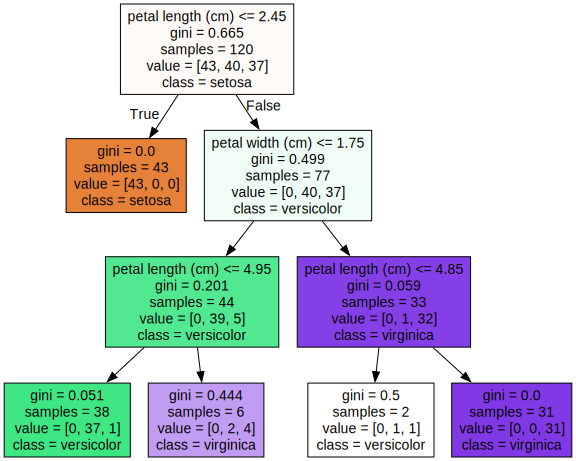

In [34]:
with open("output_3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

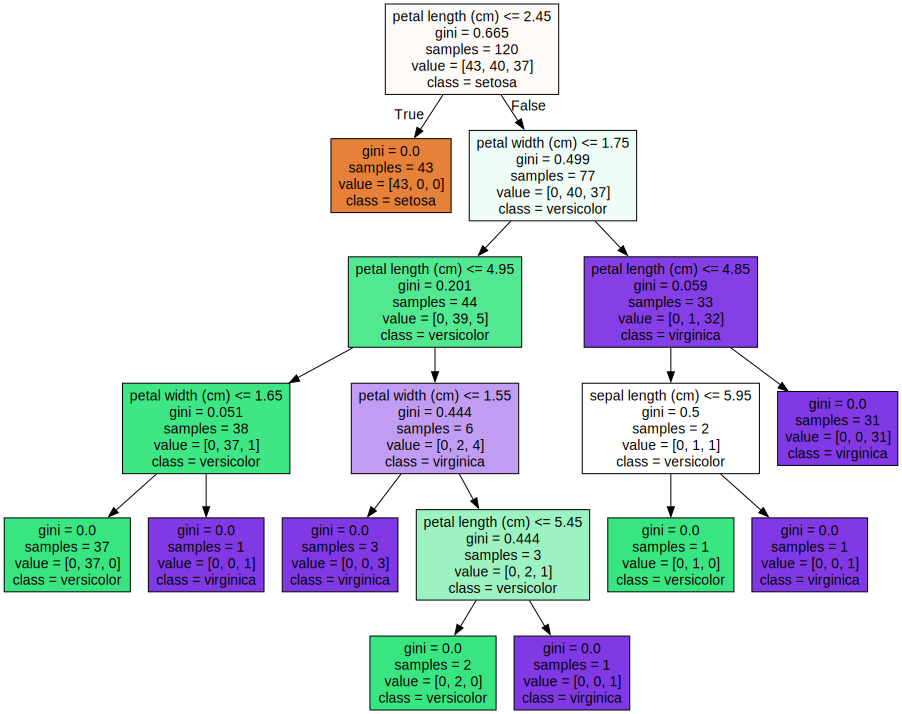

In [35]:
with open("output.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances :
[0.    0.    0.628 0.372]
sepal length (cm) :  0.000
sepal width (cm) :  0.000
petal length (cm) :  0.628
petal width (cm) :  0.372


<Axes: >

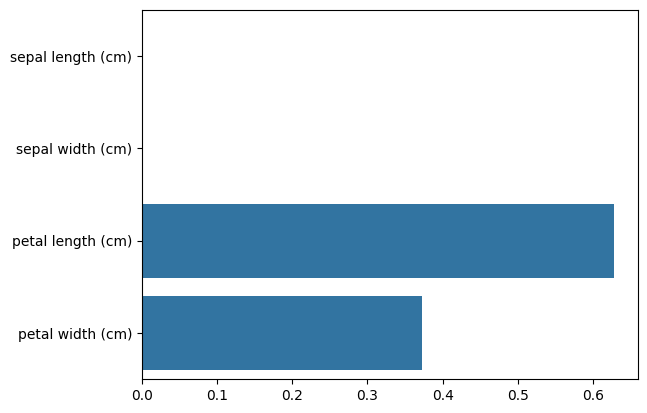

In [51]:
import seaborn as sns
import numpy as np
%matplotlib inline

print(f"Feature importances :\n{np.round(dt_clf_3.feature_importances_, 3)}")

for name, value in zip(iris.feature_names, dt_clf_3.feature_importances_) :
    print(f'{name} : {value: .3f}')

sns.barplot(x = dt_clf_3.feature_importances_, y = iris.feature_names)


Feature importances :
[0.013 0.    0.6   0.387]
sepal length (cm) :  0.013
sepal width (cm) :  0.000
petal length (cm) :  0.600
petal width (cm) :  0.387


<Axes: >

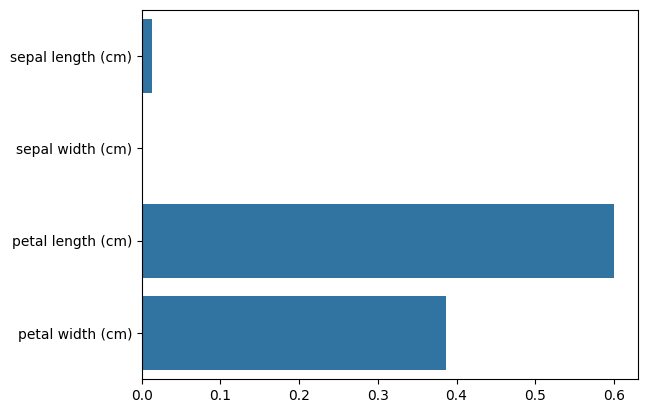

In [52]:
print(f"Feature importances :\n{np.round(dt_clf.feature_importances_, 3)}")

for name, value in zip(iris.feature_names, dt_clf.feature_importances_) :
    print(f'{name} : {value: .3f}')

sns.barplot(x = dt_clf.feature_importances_, y = iris.feature_names)


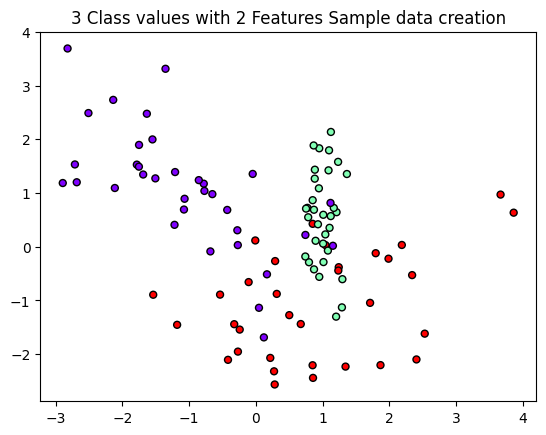

In [53]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                           n_classes=3,n_clusters_per_class=1,random_state=0)

plt.scatter(X_features[:,0],X_features[:,1],marker = 'o', c=y_labels,s=25,cmap='rainbow',edgecolors='k')

In [57]:
import numpy as np

def visualize_boundary (model, X, y) :
    fig, ax = plt.subplots()
    
    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k', clim = (y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder = 1)

C:\Users\geonh\AppData\Local\Temp\ipykernel_36320\159216887.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder = 1)


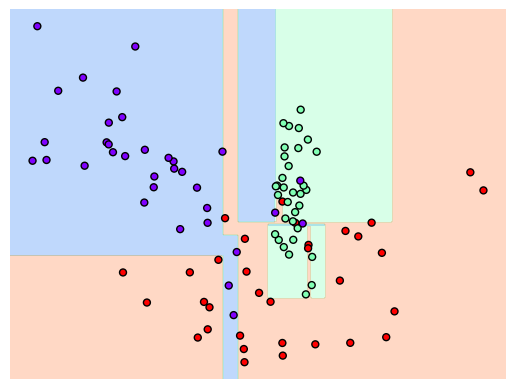

In [58]:
visualize_boundary(dt_clf,X_features,y_labels)

C:\Users\geonh\AppData\Local\Temp\ipykernel_36320\159216887.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder = 1)


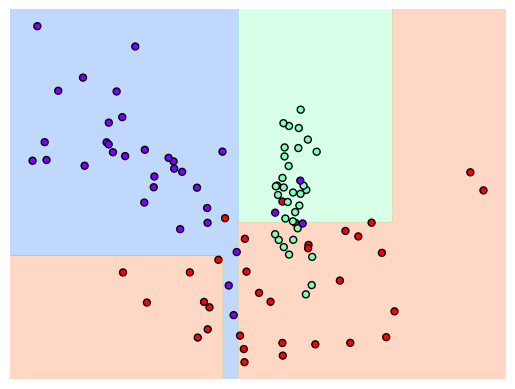

In [59]:
visualize_boundary(dt_clf_3,X_features,y_labels)